## Import Libraries

In [0]:
import numpy as np
import cv2

In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-26 11:46:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  1008KB/s    in 5m 2s   

2020-04-26 11:51:29 (803 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



## Load YoLo

In [0]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Loading Image

In [0]:
img = cv2.imread("test2.jpg")
img = cv2.resize(img,None, fx=0.4,fy=0.4)
height, width, channels = img.shape

## Detecting Objects

In [0]:
blob  = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs  = net.forward(output_layers)

## Showing informations on the screen

In [0]:
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores  = detection[5:]
    class_id  = np.argmax(scores)
    confidence  = scores[class_id]
    if  confidence > 0.5:
      #Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      # Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


### Non-Maximum Suppression

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,  0.4)

### Show in image

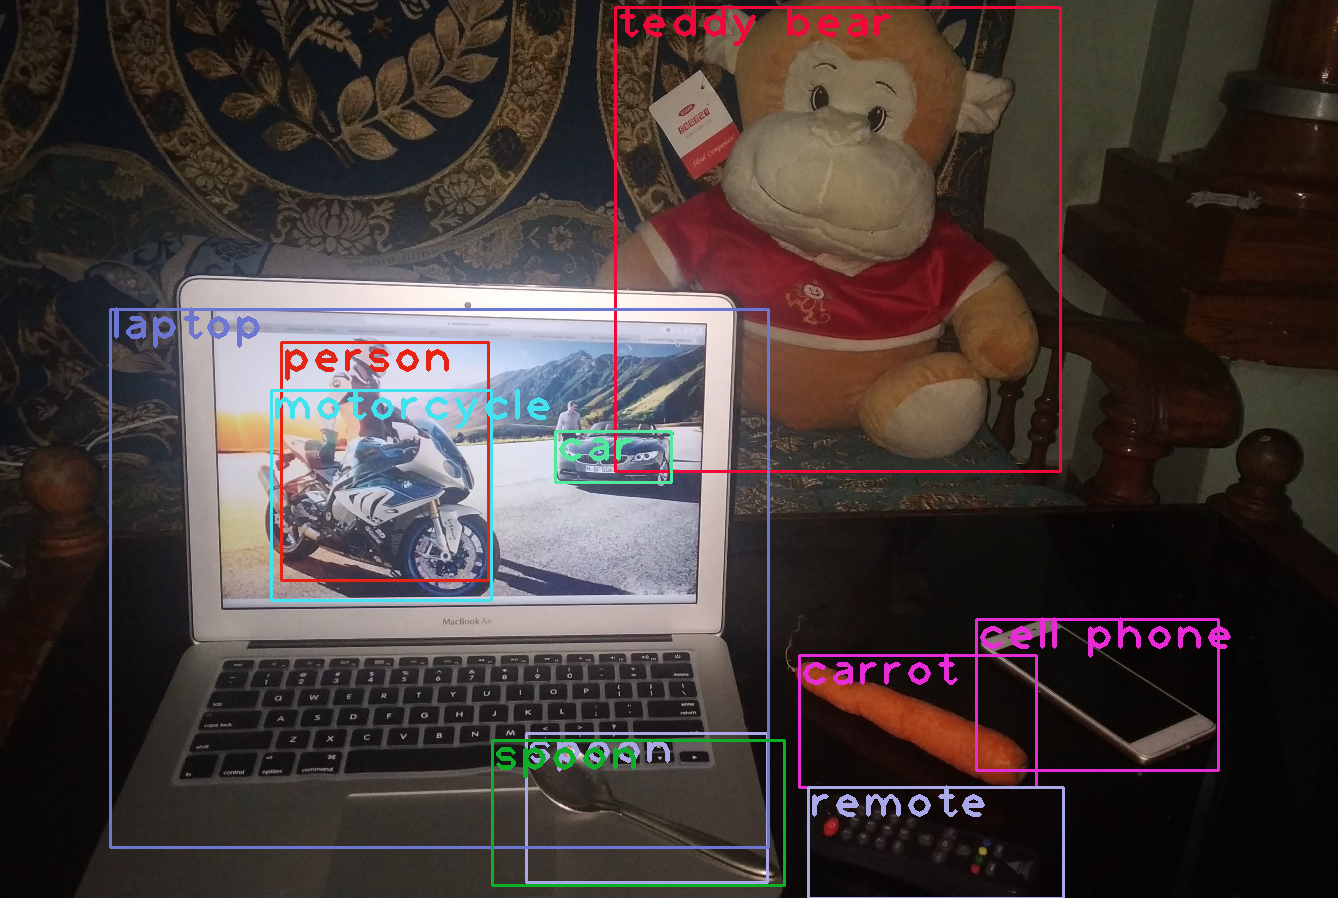

In [12]:
from google.colab.patches import cv2_imshow
font  = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h  = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[i]
    cv2.rectangle(img, (x,y), (x + w, y+h), color, 2)
    cv2.putText(img, label, (x, y+30), font, 3, color, 3)

cv2_imshow(img)

### Save to disk

In [13]:
cv2.imwrite("tes2_detected.jpg", img)

True